In [1]:
import s3fs
import xarray as xr
import urllib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy as cy
from matplotlib.colors import LogNorm
import matplotlib.path as mpath
import numpy as np

In [6]:
data1 = xr.open_dataset('data/sea_ice_conc/ice_conc_2000.nc')
data1

<xarray.Dataset>
Dimensions:   (time: 365, xc: 432, yc: 432)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01T12:00:00 ... 2000-12-31T12:00:00
  * xc        (xc) float64 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc        (yc) float64 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
    lat       (yc, xc) float32 ...
    lon       (yc, xc) float32 ...
Data variables:
    ice_conc  (time, yc, xc) float64 ...
Attributes: (12/40)
    title:                     Sea Ice Concentration Climate Data Record from...
    summary:                   This climate data record of sea ice concentrat...
    topiccategory:             Oceans ClimatologyMeteorologyAtmosphere
    keywords:                  Earth Science > Cryosphere > Sea Ice > Sea Ice...
    keywords_vocabulary:       GCMD Science Keywords
    geospatial_lat_min:        16.62393
    ...                        ...
    tracking_id:               2ac29280-1a8c-4f01-a9a3-0e4cb3027bde
    naming_authority:          int.eumetsat
    Conventions:               CF-1.6 ACDD-1.3
    standard_name_vocabulary:  CF Standard Name Table (v36, 21 September 2016)
    id:                        10.15770/EUM_SAF_OSI_0008
    product_version:           2.0

In [4]:
data2 = xr.open_dataset('data/sea_ice_conc/ice_conc_2001.nc')

In [9]:
data_merged = xr.concat([data1.ice_conc, data2.ice_conc], dim='time')
data_merged

<xarray.DataArray 'ice_conc' (time: 730, yc: 432, xc: 432)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T12:00:00 ... 2001-12-31T12:00:00
  * xc       (xc) float64 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc       (yc) float64 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
    lat      (yc, xc) float32 16.62 16.82 17.02 17.22 ... 17.02 16.82 16.62
    lon      (yc, xc) float32 -135.0 -135.1 -135.3 -135.4 ... 44.73 44.87 45.0
Attributes:
    long_name:            fully filtered concentration of sea ice using atmos...
    standard_name:        sea_ice_area_fraction
    units:                %
    valid_min:            0
    valid_max:            10000
    grid_mapping:         Lambert_Azimuthal_Grid
    ancillary_variables:  total_standard_error status_flag
    comment:              this field is the primary sea ice concentration est...

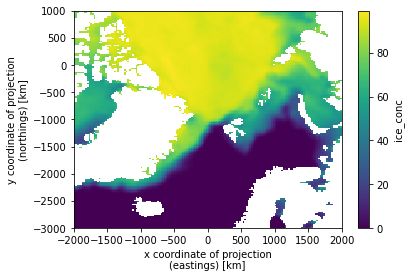

In [28]:
data_merged.sel(time='2000').mean(dim='time').plot(xlim=[-2000,2000], ylim=[-3000,1000])

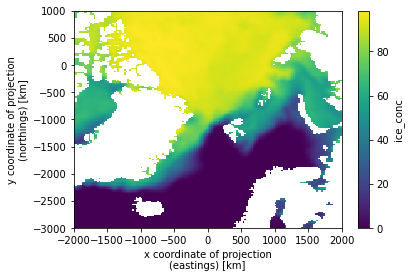

In [29]:
data_merged.sel(time='2001').mean(dim='time').plot(xlim=[-2000,2000], ylim=[-3000,1000])

In [36]:
data3 = xr.open_dataset('data/sea_ice_conc/ice_conc_2002.nc')
data3

<xarray.Dataset>
Dimensions:   (time: 365, xc: 432, yc: 432)
Coordinates:
  * time      (time) datetime64[ns] 2002-01-01T12:00:00 ... 2002-12-31T12:00:00
  * xc        (xc) float64 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc        (yc) float64 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
    lat       (yc, xc) float32 ...
    lon       (yc, xc) float32 ...
Data variables:
    ice_conc  (time, yc, xc) float64 ...
Attributes: (12/40)
    title:                     Sea Ice Concentration Climate Data Record from...
    summary:                   This climate data record of sea ice concentrat...
    topiccategory:             Oceans ClimatologyMeteorologyAtmosphere
    keywords:                  Earth Science > Cryosphere > Sea Ice > Sea Ice...
    keywords_vocabulary:       GCMD Science Keywords
    geospatial_lat_min:        16.62393
    ...                        ...
    tracking_id:               7fd17acf-8b2a-4202-98e6-52e2a59d0e64
    naming_authority:          int.eumetsat
    Conventions:               CF-1.6 ACDD-1.3
    standard_name_vocabulary:  CF Standard Name Table (v36, 21 September 2016)
    id:                        10.15770/EUM_SAF_OSI_0008
    product_version:           2.0

In [42]:
years = np.arange(2000, 2018, 1)
array = []
for y in years:
    data = xr.open_dataset(f'data/sea_ice_conc/ice_conc_{y}.nc')
    array.append(data)
sea_ice_merged = xr.concat(array, dim='time')

In [43]:
sea_ice_merged

<xarray.Dataset>
Dimensions:   (time: 730, xc: 432, yc: 432)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01T12:00:00 ... 2001-12-31T12:00:00
  * xc        (xc) float64 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc        (yc) float64 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
    lat       (yc, xc) float32 16.62 16.82 17.02 17.22 ... 17.02 16.82 16.62
    lon       (yc, xc) float32 -135.0 -135.1 -135.3 -135.4 ... 44.73 44.87 45.0
Data variables:
    ice_conc  (time, yc, xc) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
Attributes: (12/40)
    title:                     Sea Ice Concentration Climate Data Record from...
    summary:                   This climate data record of sea ice concentrat...
    topiccategory:             Oceans ClimatologyMeteorologyAtmosphere
    keywords:                  Earth Science > Cryosphere > Sea Ice > Sea Ice...
    keywords_vocabulary:       GCMD Science Keywords
    geospatial_lat_min:        16.62393
    ...                        ...
    tracking_id:               2ac29280-1a8c-4f01-a9a3-0e4cb3027bde
    naming_authority:          int.eumetsat
    Conventions:               CF-1.6 ACDD-1.3
    standard_name_vocabulary:  CF Standard Name Table (v36, 21 September 2016)
    id:                        10.15770/EUM_SAF_OSI_0008
    product_version:           2.0